In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def euro_option(x, K, S):
    #K = strike price, S = security
    '''
    0 = Long Call
    1 = Long Put
    2 = Short Call
    3 = Short Put
    '''
    payoff = 0
    
    if (x==0):
        payoff = np.maximum(S-K, 0)

    elif(x==1):
        payoff = np.maximum(K-S, 0)
        
    elif(x==2):
        payoff = -np.maximum(S-K, 0)

    elif(x==3):
        payoff = -np.maximum(K-S, 0)

    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K, color="red", linestyle="--", label="Strike Price")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    if (x==0):
        plt.title("Long Call Payoff")
        plt.plot(S, payoff, label=f"Long Call (K={K})")
    elif(x==1):
        plt.title("Long Put Payoff")
        plt.plot(S, payoff, label=f"Long Put (K={K})")
    elif(x==2):
        plt.title("Short Call Payoff")
        plt.plot(S, payoff, label=f"Short Call (K={K})")

    elif(x==3):
        plt.title("Short Put Payoff")
        plt.plot(S, payoff, label=f"Short Put (K={K})")
    plt.legend()
    plt.grid(True)
    plt.show()


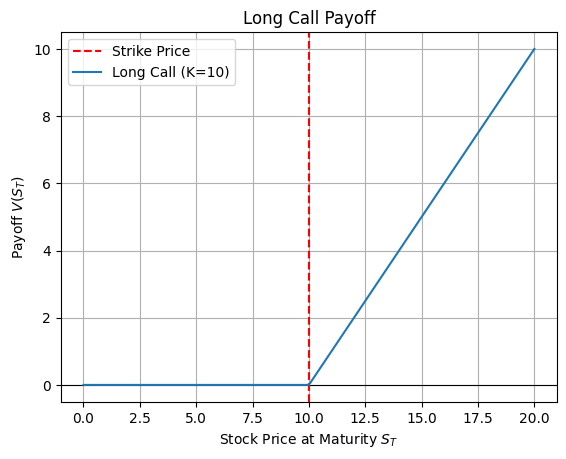

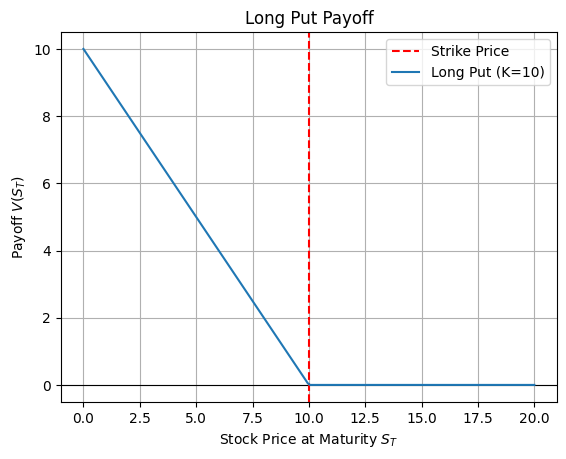

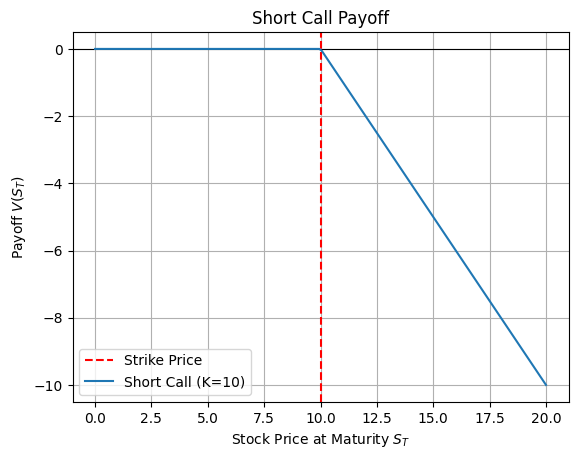

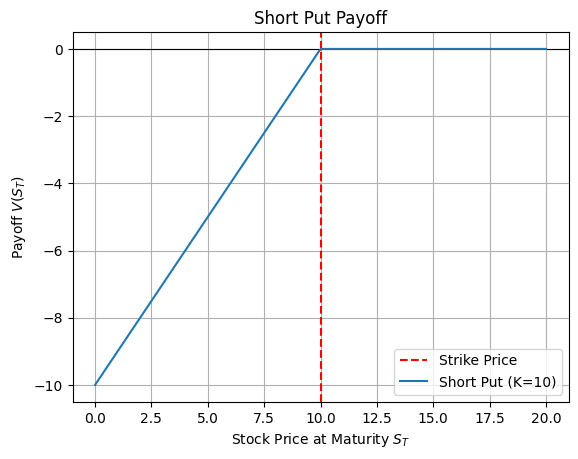

In [3]:
S=np.linspace(0, 20, 200)
for x in range(4):
    euro_option(x=x, K=10, S=S)

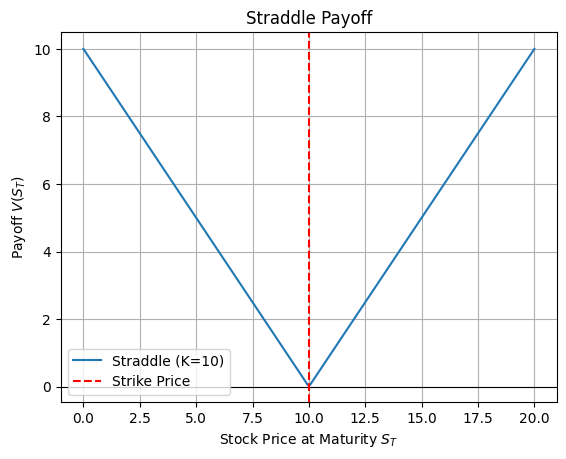

'\nThe graph definitely matches |X| shifted by K to the right. \nWhen K<S, we have payoff_2 only and when K>S we have payoff_1 only.\n'

In [4]:
#Straddle
def straddle(K, S):
    payoff_1 = np.maximum(S-K, 0)
    payoff_2 = np.maximum(K-S, 0)
    total = payoff_1 + payoff_2

    plt.plot(S, total, label=f"Straddle (K={K})")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K, color="red", linestyle="--", label="Strike Price")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    plt.title("Straddle Payoff")
    plt.legend()
    plt.grid(True)
    plt.show()

S=np.linspace(0, 20, 200)
straddle(K=10, S=S)
'''
The graph definitely matches |X| shifted by K to the right. 
When K<S, we have payoff_2 only and when K>S we have payoff_1 only.
'''

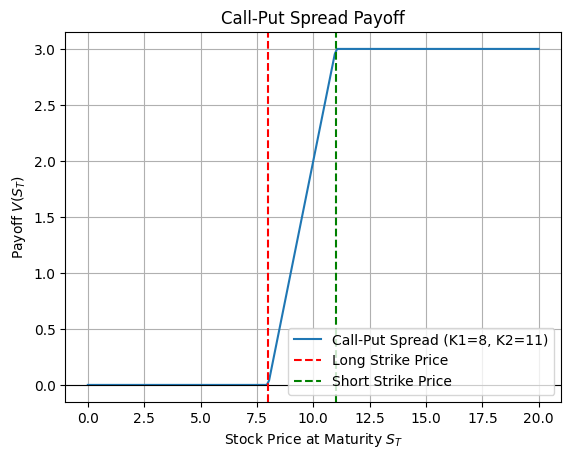

In [5]:
def call_put(K1, K2, S):
    #K1 < K2
    payoff_1 = np.maximum(S-K1, 0)
    payoff_2 = -np.maximum(S-K2, 0)
    total = payoff_1 + payoff_2

    plt.plot(S, total, label=f"Call-Put Spread (K1={K1}, K2={K2})")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K1, color="red", linestyle="--", label="Long Strike Price")
    plt.axvline(K2, color="green", linestyle="--", label="Short Strike Price")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    plt.title("Call-Put Spread Payoff")
    plt.legend()
    plt.grid(True)
    plt.show()

S=np.linspace(0, 20, 200)
call_put(K1=8, K2=11, S=S)

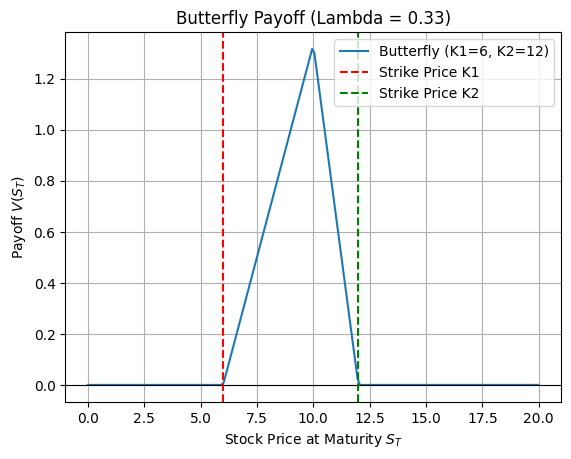

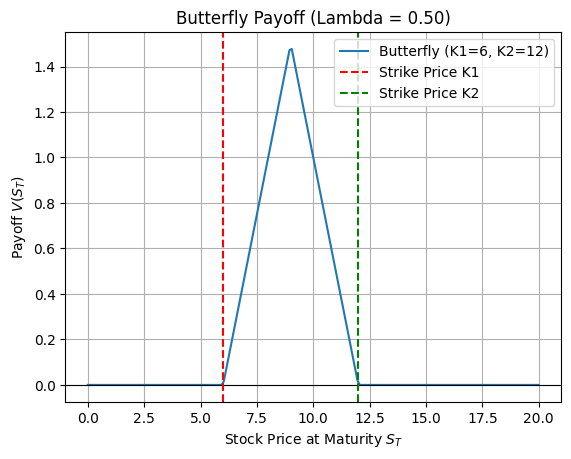

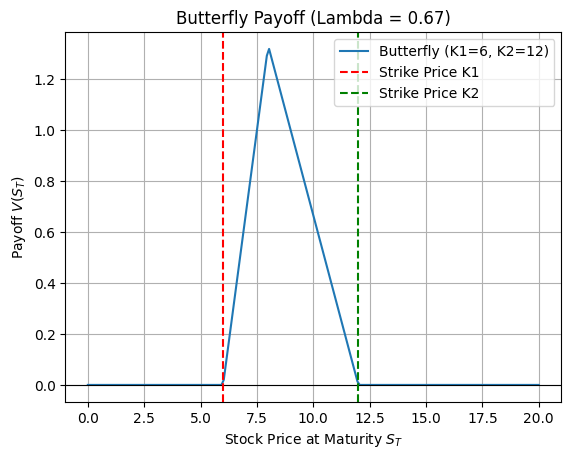

In [6]:
def butterfly(lam, K1, K2, S): 
    aggregate_strike = lam*K1 + (1-lam)*K2
    payoff_lam1 = lam*np.maximum(S-K1, 0) #long call
    payoff_lam2 = (1-lam)*np.maximum(S-K2, 0) #long put
    payoff_lam3 = -np.maximum(S-aggregate_strike, 0)
    total_lam = payoff_lam1 + payoff_lam2 + payoff_lam3

    plt.plot(S, total_lam, label=f"Butterfly (K1={K1}, K2={K2})")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K1, color="red", linestyle="--", label="Strike Price K1")
    plt.axvline(K2, color="green", linestyle="--", label="Strike Price K2")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    plt.title(f"Butterfly Payoff (Lambda = {lam:.2f})")
    plt.legend()
    plt.grid(True)
    plt.show()

S=np.linspace(0, 20, 200)
for lam in [1/3, 1/2, 2/3]:
    butterfly(lam=lam,K1=6, K2=12, S=S)

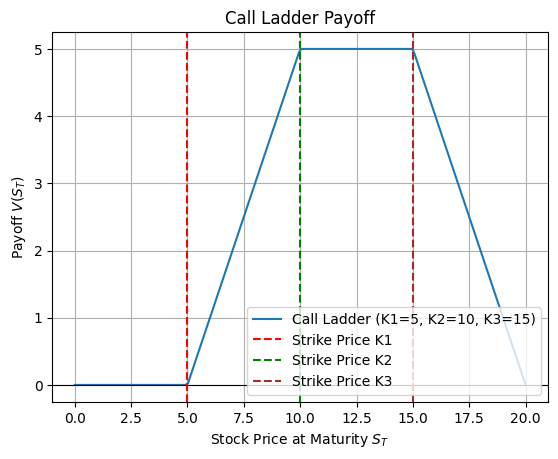

'\nOne thing to notice is that the Call Lader is the only instrument where the potential loss is unbounded. \nThis can be seen when the upper bound of np.linspace is exaggerated to a large number or K2, K3 are changed accordingly. \nIn our context, this is when the price at maturity increases toward infinity \nthus our loss (since we shorted 2 and only longed 1) tends towards infinity. \n'

In [7]:
def call_lader(K1, K2, K3, S):
    payoff_CL1 = np.maximum(S-K1, 0)
    payoff_CL2 = -np.maximum(S-K2, 0)
    payoff_CL3 = -np.maximum(S-K3, 0)
    total_CL = payoff_CL1 + payoff_CL2 + payoff_CL3

    plt.plot(S, total_CL, label=f"Call Ladder (K1={K1}, K2={K2}, K3={K3})")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K1, color="red", linestyle="--", label="Strike Price K1")
    plt.axvline(K2, color="green", linestyle="--", label="Strike Price K2")
    plt.axvline(K3, color="brown", linestyle="--", label="Strike Price K3")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    plt.title(f"Call Ladder Payoff")
    plt.legend()
    plt.grid(True)
    plt.show()

S =np.linspace(0, 20, 200)
call_lader(K1=5, K2=10, K3=15, S=S)

'''
One thing to notice is that the Call Lader is the only instrument where the potential loss is unbounded. 
This can be seen when the upper bound of np.linspace is exaggerated to a large number or K2, K3 are changed accordingly. 
In our context, this is when the price at maturity increases toward infinity 
thus our loss (since we shorted 2 and only longed 1) tends towards infinity. 
'''

In [8]:
def dig_option(x, K, S):
    #K = strike price, S = security
    '''
    0 = Long Call
    1 = Long Put
    2 = Short Call
    3 = Short Put
    '''
    if (x==0):
        return (S > K).astype(int)

    elif(x==1):
        return (S < K).astype(int)

    elif(x==2):
        return -(S > K).astype(int)

    elif(x==3):
        return -(S < K).astype(int)


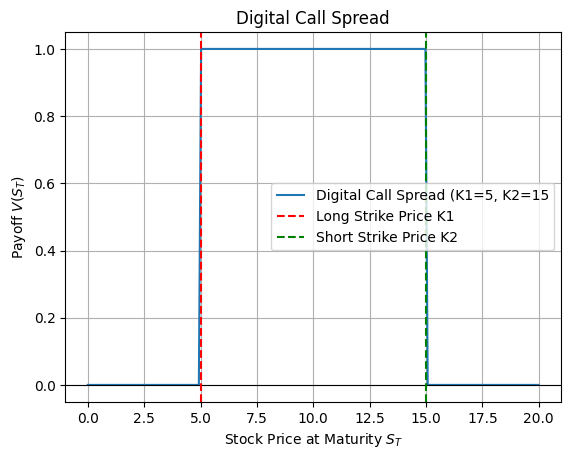

In [9]:
def dig_call(K1, K2, S):
    total_dig_call = dig_option(x=0, K=K1, S=S) + dig_option(x=2, K=K2, S=S)

    plt.plot(S, total_dig_call, label=f"Digital Call Spread (K1={K1}, K2={K2}")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(K1, color="red", linestyle="--", label="Long Strike Price K1")
    plt.axvline(K2, color="green", linestyle="--", label="Short Strike Price K2")
    plt.xlabel("Stock Price at Maturity $S_T$")
    plt.ylabel("Payoff $V(S_T)$")
    plt.title(f"Digital Call Spread")
    plt.legend()
    plt.grid(True)
    plt.show()

S =np.linspace(0, 20, 200)
dig_call(K1=5,K2=15, S=S)